In [130]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
import glob, re

import scienceplots

plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [131]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [132]:
PSO_DIR = get_last_folder("../build/results_pso/")
SA_DIR = get_last_folder("../build/results_sa/")

file_spad_figures_PSO = f"{PSO_DIR}/BEST/SPAD_figures_best_path.csv"
file_spad_figures_SA = f"{SA_DIR}/BEST/SPAD_figures_best_path.csv"

In [133]:
Iteration_PSO, BV_PSO, BrP_PSO, DW_PSO, Cost_PSO = np.loadtxt(file_spad_figures_PSO, delimiter=',', unpack=True, skiprows=1)
Iteration_SA, BV_SA, BrP_SA, DW_SA, Cost_SA = np.loadtxt(file_spad_figures_SA, delimiter=',', unpack=True, skiprows=1)

DW_SA *= 1.0e6
DW_PSO *= 1.0e6

# Sort by iteration
idx_PSO = np.argsort(Iteration_PSO)
idx_SA = np.argsort(Iteration_SA)

Iteration_PSO = Iteration_PSO[idx_PSO]
BV_PSO = BV_PSO[idx_PSO]
BrP_PSO = BrP_PSO[idx_PSO]
DW_PSO = DW_PSO[idx_PSO]
Cost_PSO = Cost_PSO[idx_PSO]

Iteration_SA = Iteration_SA[idx_SA]
BV_SA = BV_SA[idx_SA]
BrP_SA = BrP_SA[idx_SA]
DW_SA = DW_SA[idx_SA]
Cost_SA = Cost_SA[idx_SA]


In [134]:
# Clean the data, remove unconverged iterations (BrP drops a lot)

clean = True
while not clean:

    list_bad_idx_PSO = []
    list_bad_idx_SA = []
    for i in range(1, len(BrP_PSO)):
        if BrP_PSO[i] < 0.5*BrP_PSO[i-1]:
            list_bad_idx_PSO.append(i)

    for i in range(1, len(BrP_SA)):
        if BrP_SA[i] < 0.5*BrP_SA[i-1]:
            list_bad_idx_SA.append(i)

    print(f"Bad idx PSO: {list_bad_idx_PSO}")
    print(f"Bad idx SA: {list_bad_idx_SA}")

    Iteration_PSO = np.delete(Iteration_PSO, list_bad_idx_PSO)
    BV_PSO = np.delete(BV_PSO, list_bad_idx_PSO)
    BrP_PSO = np.delete(BrP_PSO, list_bad_idx_PSO)
    DW_PSO = np.delete(DW_PSO, list_bad_idx_PSO)
    Cost_PSO = np.delete(Cost_PSO, list_bad_idx_PSO)

    Iteration_SA = np.delete(Iteration_SA, list_bad_idx_SA)
    BV_SA = np.delete(BV_SA, list_bad_idx_SA)
    BrP_SA = np.delete(BrP_SA, list_bad_idx_SA)
    DW_SA = np.delete(DW_SA, list_bad_idx_SA)
    Cost_SA = np.delete(Cost_SA, list_bad_idx_SA)
    
    clean = (len(list_bad_idx_PSO) == 0 and len(list_bad_idx_SA) == 0)
    


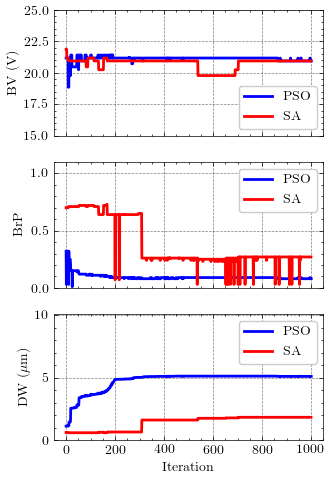

In [135]:
fig, ax = plt.subplots(3, 1, figsize=(3.5, 5), sharex=True)

ax[0].set_ylabel('BV (V)')
ax[1].set_ylabel('BrP')
ax[2].set_ylabel('DW ($\mu$m)')
ax[2].set_xlabel('Iteration')

ax[0].plot(Iteration_PSO, BV_PSO, color='b', ls='-', lw=2, label="PSO")
ax[1].plot(Iteration_PSO, BrP_PSO, color='b', ls="-", lw=2, label="PSO")
ax[2].plot(Iteration_PSO, DW_PSO, color='b', ls="-", lw=2, label="PSO")
ax[0].plot(Iteration_SA, BV_SA, color='r', ls="-", lw=2, label="SA")
ax[1].plot(Iteration_SA, BrP_SA, color='r', ls="-", lw=2, label="SA")
ax[2].plot(Iteration_SA, DW_SA, color='r', ls="-", lw=2, label="SA")

ax[0].set_ylim(15, 25)
ax[1].set_ylim(0, 1.1)
ax[2].set_ylim(0, 10.1)

for a in ax:
    a.legend()

fig.tight_layout()

rd = np.random.randint(0, 1000)
fig.savefig(f'figuresiter_{rd}.pdf', dpi=300)

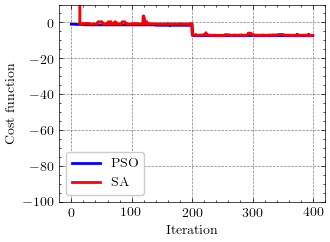

In [123]:
# Plot cost function
fig, ax = plt.subplots(1, 1)

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost function')

ax.plot(Iteration_PSO, Cost_PSO, color='b', ls="-", label="PSO", lw=2)
ax.plot(Iteration_SA, Cost_SA, color='r', ls="-", label="SA", lw=2)
ax.set_ylim(bottom=-100, top=10)
ax.legend()

fig.tight_layout()
#fig.savefig('/home/remi/Papers/IWCN23/figuresiter_cost.pdf', dpi=300)
